loading required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from scipy.stats import skew,normaltest
from sklearn.decomposition import PCA

loading dataset

In [2]:
df = pd.read_csv("Food_Time_Data_Set.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45


general info about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  object 
 1   Delivery_person_ID           10000 non-null  object 
 2   Delivery_person_Age          10000 non-null  float64
 3   Delivery_person_Ratings      10000 non-null  float64
 4   Restaurant_latitude          10000 non-null  float64
 5   Restaurant_longitude         10000 non-null  float64
 6   Delivery_location_latitude   10000 non-null  float64
 7   Delivery_location_longitude  10000 non-null  float64
 8   Type_of_order                10000 non-null  object 
 9   Type_of_vehicle              10000 non-null  object 
 10  temperature                  9995 non-null   float64
 11  humidity                     9995 non-null   float64
 12  precipitation                9995 non-null   float64
 13  weather_descript

handling missing values

In [4]:
df.isna().sum()

ID                                 1
Delivery_person_ID                 1
Delivery_person_Age                1
Delivery_person_Ratings            1
Restaurant_latitude                1
Restaurant_longitude               1
Delivery_location_latitude         1
Delivery_location_longitude        1
Type_of_order                      1
Type_of_vehicle                    1
temperature                        6
humidity                           6
precipitation                      6
weather_description                6
Unnamed: 14                    10001
Traffic_Level                    916
Distance (km)                    921
TARGET                           542
dtype: int64

In [5]:
#finding index of the first 8 colums because they only have one missing value
for i in df.iloc[:, :8].columns:
    df1 = df[df[i].isna()].index
    print(df1)

Index([10000], dtype='int64')
Index([10000], dtype='int64')
Index([10000], dtype='int64')
Index([10000], dtype='int64')
Index([10000], dtype='int64')
Index([10000], dtype='int64')
Index([10000], dtype='int64')
Index([10000], dtype='int64')


since the index of all those value is 100000. it shows the row 100000 has the most mising values so ill remove that rown. which will cause no trouble in data.

In [6]:
df.drop(10000, inplace=True)
df.drop_duplicates(inplace=True)
df.isna().sum()

ID                                 0
Delivery_person_ID                 0
Delivery_person_Age                0
Delivery_person_Ratings            0
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Type_of_order                      0
Type_of_vehicle                    0
temperature                        5
humidity                           5
precipitation                      5
weather_description                5
Unnamed: 14                    10000
Traffic_Level                    915
Distance (km)                    920
TARGET                           541
dtype: int64

In [7]:
df.isna().sum().sum()

12396

In [8]:
for i in df.columns: #finding unique values in each column
    if len(df[i].unique()) <= 20: #if unique values are less then 20. i will consider it as catagoriacal data and print the unique values
        print(f'-----{i}---------')
        df1 = df[i].unique()  
        for j in range(len(df1)):
            k = (df[i] == df1[j]).sum()
            print(f'{df1[j]} = {k}')
    else: #if unique values are more than 20 then continuous data but still show the number of unique values
        print(f'####{i} has {len(df[i].unique())} unique values.')


####ID has 9995 unique values.
####Delivery_person_ID has 1285 unique values.
####Delivery_person_Age has 22 unique values.
####Delivery_person_Ratings has 28 unique values.
####Restaurant_latitude has 485 unique values.
####Restaurant_longitude has 427 unique values.
####Delivery_location_latitude has 3445 unique values.
####Delivery_location_longitude has 3445 unique values.
-----Type_of_order---------
Snack  = 2551
Drinks  = 2507
Buffet  = 2412
Meal  = 2530
-----Type_of_vehicle---------
motorcycle  = 5862
scooter  = 3304
electric_scooter  = 814
bicycle  = 20
####temperature has 1070 unique values.
####humidity has 65 unique values.
####precipitation has 36 unique values.
-----weather_description---------
haze = 2406
mist = 1751
broken clouds = 721
clear sky = 3260
scattered clouds = 422
overcast clouds = 308
light rain = 536
smoke = 501
fog = 49
few clouds = 40
nan = 0
moderate rain = 1
-----Unnamed: 14---------
nan = 0
-----Traffic_Level---------
Low = 1726
Very High = 1772
Moderat

column unamed seems like an empty column

In [9]:
df.drop(columns=['Unnamed: 14'], inplace=True, errors='ignore')

In [10]:
print(df.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'temperature', 'humidity', 'precipitation', 'weather_description',
       'Traffic_Level', 'Distance (km)', 'TARGET'],
      dtype='object')


In [11]:
missing_rows = df[df['temperature'].isna()].index
print(missing_rows)
missing_rows=[]
missing_rows = df[df['humidity'].isna()].index
print(missing_rows)
missing_rows=[]
missing_rows = df[df['precipitation'].isna()].index
print(missing_rows)
missing_rows=[]
missing_rows = df[df['weather_description'].isna()].index
print(missing_rows)

Index([5000, 6000, 7000, 8000, 9000], dtype='int64')
Index([5000, 6000, 7000, 8000, 9000], dtype='int64')
Index([5000, 6000, 7000, 8000, 9000], dtype='int64')
Index([5000, 6000, 7000, 8000, 9000], dtype='int64')


In [12]:
df.drop([5000,6000,7000,8000,9000], inplace=True)

In [13]:
df.isna().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Type_of_order                    0
Type_of_vehicle                  0
temperature                      0
humidity                         0
precipitation                    0
weather_description              0
Traffic_Level                  915
Distance (km)                  920
TARGET                         536
dtype: int64

In [14]:
columns_to_check = ['Traffic_Level', 'Distance (km)']

# Find rows where only one column is missing (not both)
rows_with_single_missing = []

for idx, row in df[columns_to_check].iterrows():
    missing_count = row.isna().sum()
    if missing_count == 1:  # Only one missing (not both)
        rows_with_single_missing.append(idx)

print("Rows where only one value is missing (not both):", rows_with_single_missing)

Rows where only one value is missing (not both): [0, 2028, 2969, 9753, 9755]


In [15]:
column_to_check = "Traffic_Level"  # You can change this to any column name

# Split into two datasets
df_no_missing = df[df[column_to_check].notna()]  # Rows where the column is NOT missing
df_missing = df[df[column_to_check].isna()]      # Rows where the column IS missing

df_missing

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
33,2876,RANCHIRES02DEL01,32.0,3.5,0.00000,0.000000,0.11000,0.110000,Snack,scooter,26.27,84.0,0.00,overcast clouds,NaN,NaN,#VALUE!
52,C1FF,AURGRES20DEL03,25.0,5.0,0.00000,0.000000,0.03000,0.030000,Snack,motorcycle,26.28,85.0,0.10,light rain,NaN,NaN,NaN
57,8E6C,VADRES02DEL02,39.0,4.2,0.00000,0.000000,0.08000,0.080000,Snack,scooter,26.25,85.0,0.00,overcast clouds,NaN,NaN,#VALUE!
59,395B,VADRES04DEL03,36.0,4.7,0.00000,0.000000,0.06000,0.060000,Snack,motorcycle,26.28,84.0,0.00,broken clouds,NaN,NaN,#VALUE!
67,98AA,VADRES16DEL02,23.0,4.8,0.00000,0.000000,0.02000,0.020000,Meal,scooter,26.29,85.0,0.11,light rain,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,D4DC,ALHRES04DEL02,24.0,4.7,0.00000,0.000000,0.13000,0.130000,Buffet,scooter,26.44,82.0,0.23,light rain,NaN,NaN,NaN
9921,C032,KOLRES08DEL01,28.0,4.7,-22.53796,88.349843,22.60796,88.419843,Meal,scooter,28.00,65.0,0.00,haze,NaN,NaN,#VALUE!
9960,D1F1,AURGRES20DEL01,21.0,4.9,0.00000,0.000000,0.11000,0.110000,Snack,electric_scooter,26.41,82.0,0.25,light rain,NaN,NaN,NaN
9977,C5A8,BHPRES14DEL02,24.0,4.8,0.00000,0.000000,0.08000,0.080000,Snack,scooter,26.37,82.0,0.27,light rain,NaN,NaN,NaN


In [16]:
df_no_missing

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.89,43.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4347,MUMRES07DEL01,25.0,4.0,19.091458,72.827808,19.101458,72.837808,Meal,motorcycle,28.03,57.0,0.0,smoke,Low,3.78,18.2
9996,11B4,VADRES13DEL03,32.0,4.2,22.310237,73.158921,22.400237,73.248921,Meal,motorcycle,23.96,64.0,0.0,haze,High,18.92,32.61666667
9997,8336,HYDRES20DEL01,36.0,4.7,17.483216,78.552111,17.493216,78.562111,Meal,motorcycle,22.94,60.0,0.0,haze,Low,2.64,12.01666667
9998,338B,JAPRES18DEL03,37.0,4.6,26.913987,75.752891,27.053987,75.892891,Buffet,scooter,23.72,31.0,0.0,clear sky,Very High,28.80,51.06666667


after checking dataset with missing value and dataset with not missing value in distance column i can tell the data on distance column with missing value has wrongly entered data so there is no loss of important data if i remove the rows with missing data. even though the missing rows are about 920 values because the longitude and lattitude is 0 for those values that means the data is wrong so its better to remove those rows.

In [17]:
df = df.dropna(subset=['Traffic_Level'])

In [18]:
df.isna().sum()

ID                              0
Delivery_person_ID              0
Delivery_person_Age             0
Delivery_person_Ratings         0
Restaurant_latitude             0
Restaurant_longitude            0
Delivery_location_latitude      0
Delivery_location_longitude     0
Type_of_order                   0
Type_of_vehicle                 0
temperature                     0
humidity                        0
precipitation                   0
weather_description             0
Traffic_Level                   0
Distance (km)                   5
TARGET                         40
dtype: int64

In [19]:
le_veh= LabelEncoder()
df['Type_of_vehicle_encoded'] = le_veh.fit_transform(df['Type_of_vehicle'])
label_veh = dict(zip(le_veh.classes_, le_veh.transform(le_veh.classes_)))
print(label_veh)
le_ord= LabelEncoder()
df['Type_of_order_encoded'] = le_ord.fit_transform(df['Type_of_order'])
label_ord = dict(zip(le_ord.classes_, le_ord.transform(le_ord.classes_)))
print(label_ord)
le_wea= LabelEncoder()
df['weather_description_encoded'] = le_wea.fit_transform(df['weather_description'])
label_wea = dict(zip(le_wea.classes_, le_wea.transform(le_wea.classes_)))
print(label_wea)
le_tra= LabelEncoder()
df['Traffic_Level_encoded'] = le_tra.fit_transform(df['Traffic_Level'])
label_tra = dict(zip(le_tra.classes_, le_tra.transform(le_tra.classes_)))
print(label_tra)

{'bicycle ': 0, 'electric_scooter ': 1, 'motorcycle ': 2, 'scooter ': 3}
{'Buffet ': 0, 'Drinks ': 1, 'Meal ': 2, 'Snack ': 3}
{'broken clouds': 0, 'clear sky': 1, 'few clouds': 2, 'fog': 3, 'haze': 4, 'light rain': 5, 'mist': 6, 'moderate rain': 7, 'overcast clouds': 8, 'scattered clouds': 9, 'smoke': 10}
{'High': 0, 'Low': 1, 'Moderate': 2, 'Very High': 3, 'Very Low': 4}


In [20]:
df1= df.drop(columns=['ID','Delivery_person_ID','Type_of_order','Type_of_vehicle','weather_description','Traffic_Level'],axis=1)

In [21]:
column_to_check = "Distance (km)"  # You can change this to any column name

# Split into two datasets
df_no_missing = df1[df1[column_to_check].notna()]  # Rows where the column is NOT missing
df_missing = df1[df1[column_to_check].isna()]      # Rows where the column IS missing

df_missing

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET,Type_of_vehicle_encoded,Type_of_order_encoded,weather_description_encoded,Traffic_Level_encoded
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,17.11,77.0,0.0,NaN,21.66666667,2,3,4,1
2028,24.0,4.9,23.374989,85.335486,23.424989,85.385486,17.84,68.0,0.0,NaN,43.18333333,2,1,1,0
2969,28.0,4.4,11.022477,76.995667,11.112477,77.085667,25.12,73.0,0.0,NaN,45.85,2,1,6,0
9753,30.0,3.6,11.003669,76.976494,11.083669,77.056494,25.97,73.0,0.0,NaN,32.73333333,2,2,4,0
9755,37.0,4.6,19.109300,72.825451,19.199300,72.915451,26.96,57.0,0.0,NaN,70.33333333,2,2,10,3


only distance is missing other data is looking right. so ill predict the value for distance.

In [22]:
column_to_check = "TARGET"  # You can change this to any column name

# Split into two datasets
df_no_missing = df1[df1[column_to_check].notna()]  # Rows where the column is NOT missing
df_missing = df1[df1[column_to_check].isna()]      # Rows where the column IS missing

df_missing.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET,Type_of_vehicle_encoded,Type_of_order_encoded,weather_description_encoded,Traffic_Level_encoded
7131,21.0,4.9,13.066762,80.251865,13.196762,80.381865,28.35,76.0,0.17,28.92,NaN,1,3,5,3
7343,30.0,4.5,9.979186,76.317361,9.999186,76.337361,25.68,83.0,0.45,4.47,NaN,1,1,5,1
7359,35.0,4.6,13.005801,80.250744,13.115801,80.360744,28.40,82.0,0.15,26.06,NaN,2,1,5,3
7375,35.0,4.6,9.970717,76.285447,10.000717,76.315447,25.94,81.0,0.40,8.95,NaN,1,2,5,2
7397,35.0,4.5,13.081878,80.248519,13.191878,80.358519,28.34,86.0,0.14,25.34,NaN,3,2,5,3


same goes for TARGET variable so ill use the same approach as i used for distance (km) to fill the missing data

<Axes: >

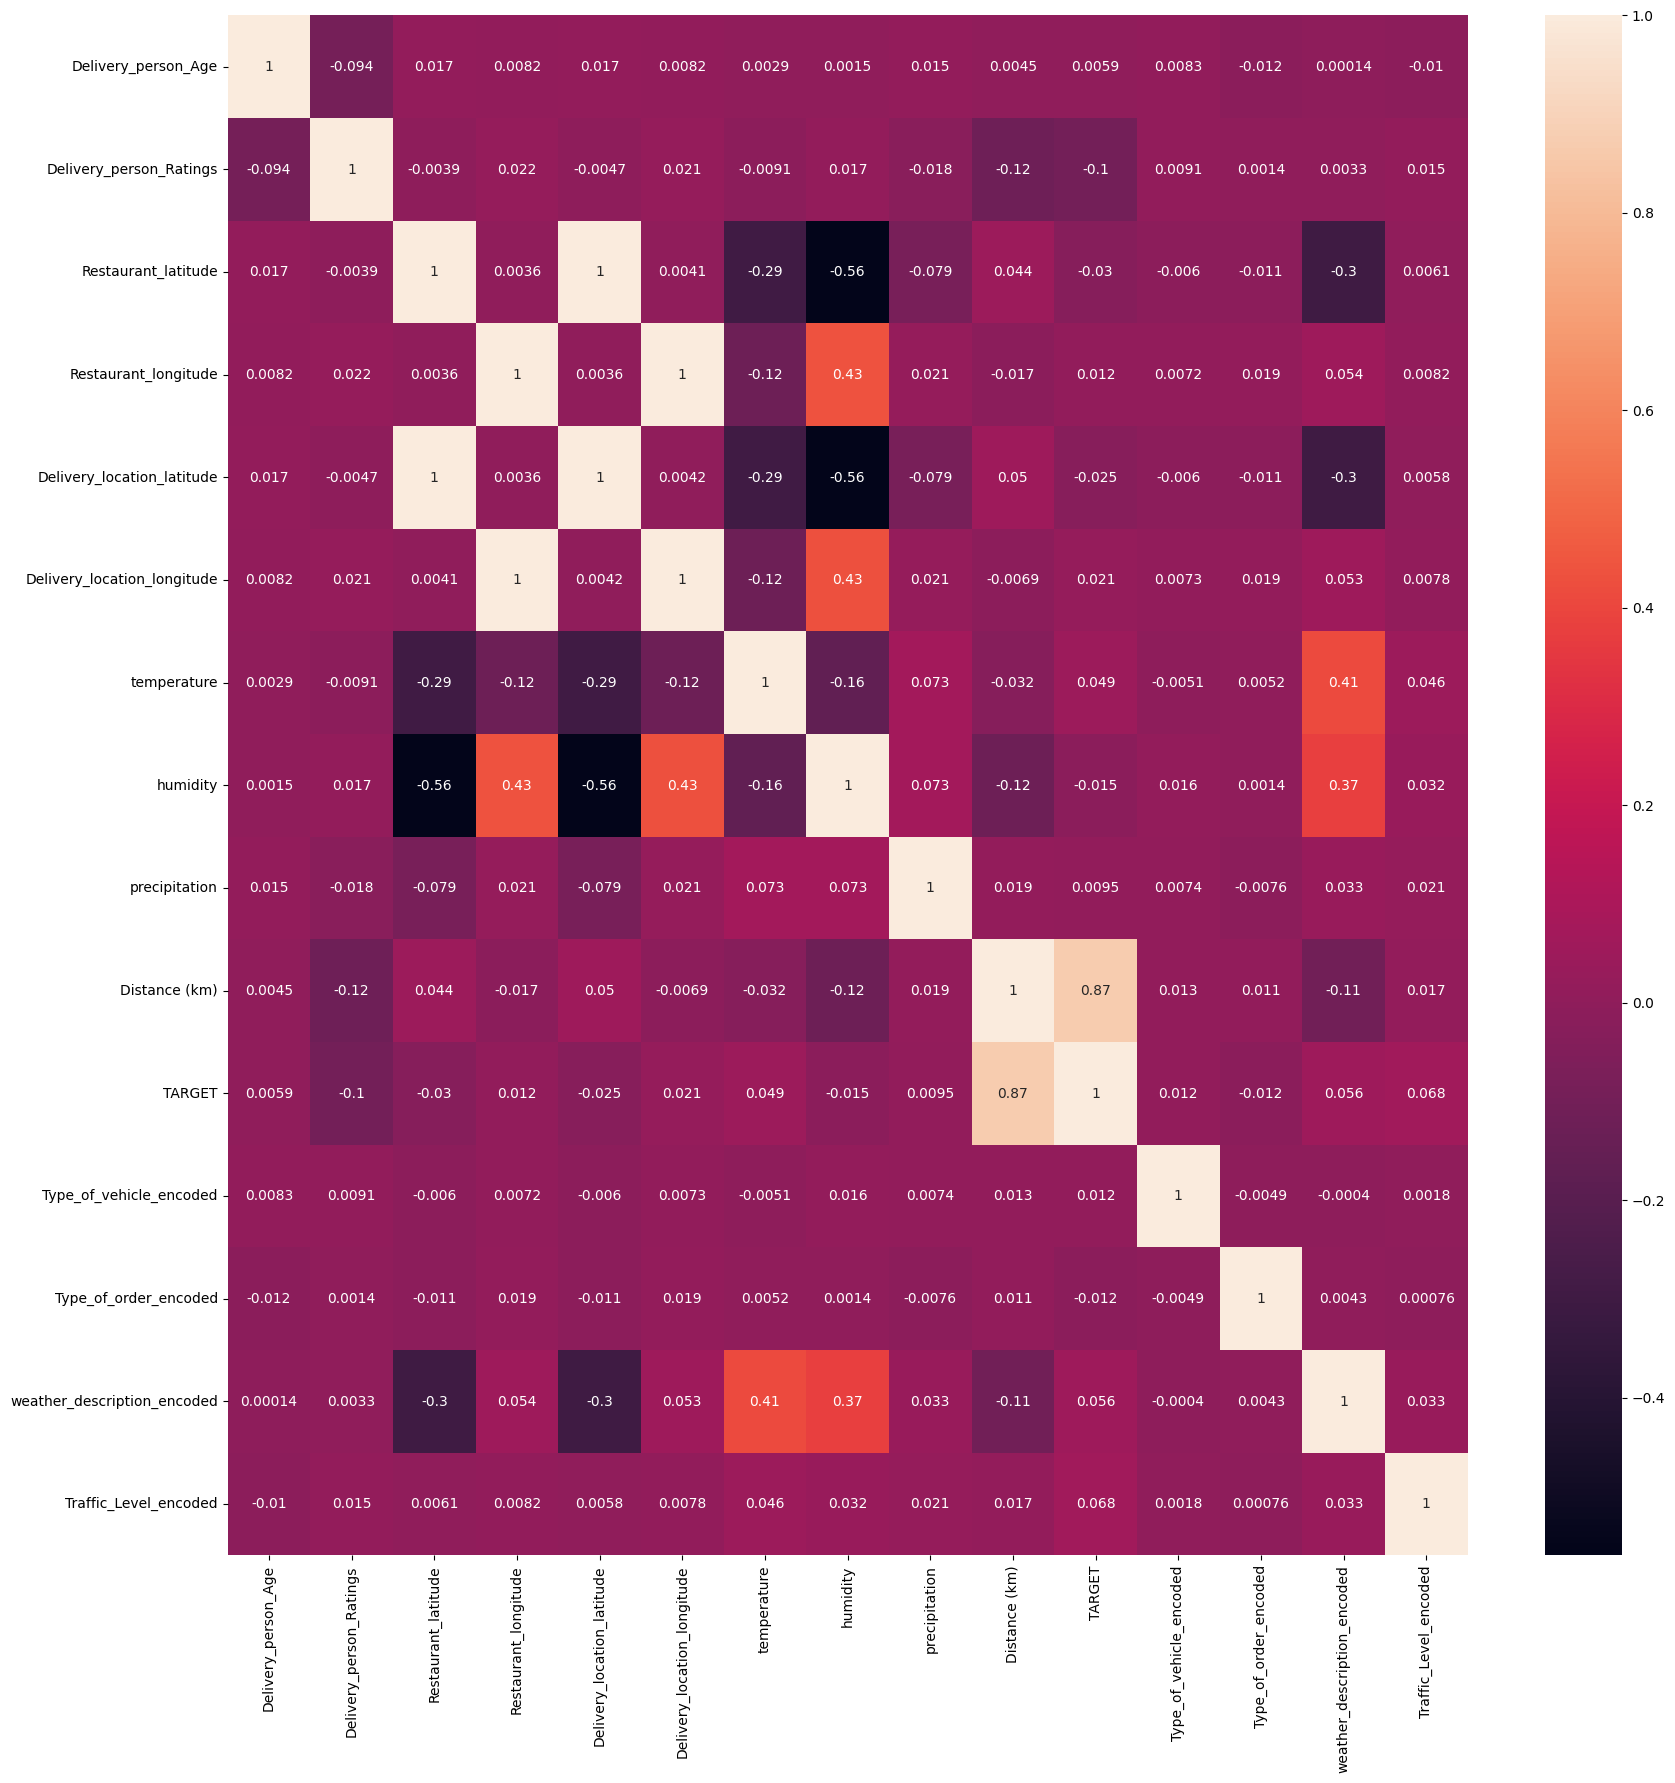

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

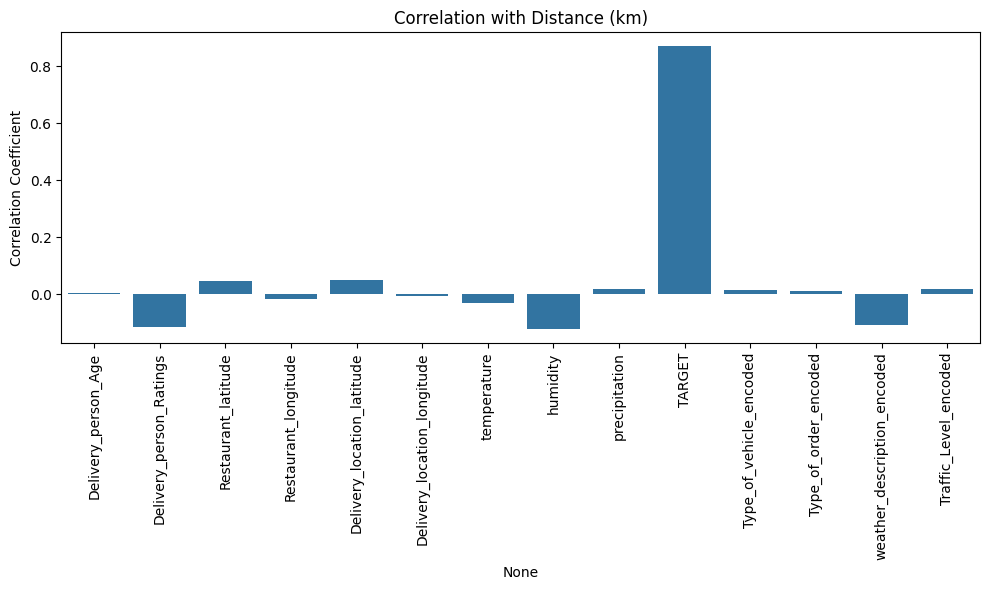

In [24]:
def plot_correlations(df, target_column):
    """Plot correlations with the target column."""
    plt.figure(figsize=(10, 6))
    correlations = df.corr()[target_column].drop(target_column)
    sns.barplot(x=correlations.index, y=correlations.values)
    plt.title(f'Correlation with {target_column}')
    plt.xticks(rotation=90)
    plt.ylabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

plot_correlations(df1, 'Distance (km)')

In [25]:
print("Columns in df1:", df1.columns.tolist())
df1.isna().sum()

Columns in df1: ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'temperature', 'humidity', 'precipitation', 'Distance (km)', 'TARGET', 'Type_of_vehicle_encoded', 'Type_of_order_encoded', 'weather_description_encoded', 'Traffic_Level_encoded']


Delivery_person_Age             0
Delivery_person_Ratings         0
Restaurant_latitude             0
Restaurant_longitude            0
Delivery_location_latitude      0
Delivery_location_longitude     0
temperature                     0
humidity                        0
precipitation                   0
Distance (km)                   5
TARGET                         40
Type_of_vehicle_encoded         0
Type_of_order_encoded           0
weather_description_encoded     0
Traffic_Level_encoded           0
dtype: int64

In [26]:
df1_clean = df1.dropna()

In [27]:
df1_clean.isna().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
temperature                    0
humidity                       0
precipitation                  0
Distance (km)                  0
TARGET                         0
Type_of_vehicle_encoded        0
Type_of_order_encoded          0
weather_description_encoded    0
Traffic_Level_encoded          0
dtype: int64

In [28]:
x=df1_clean[['Delivery_person_Ratings','humidity','weather_description_encoded','TARGET']]
y=df1_clean['Distance (km)'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50)

In [30]:
y_pred=rf.predict(x_test)

In [31]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('The mean square error is :',mse)
print('The R2 score is :',r2)

The mean square error is : 14.485830535696996
The R2 score is : 0.7995993400253147


In [32]:
column_to_check = "Distance (km)"  # You can change this to any column name

# Split into two datasets
df_no_missing = df1[df1[column_to_check].notna()]  # Rows where the column is NOT missing
df_missing = df1[df1[column_to_check].isna()]      # Rows where the column IS missing

df_missing

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET,Type_of_vehicle_encoded,Type_of_order_encoded,weather_description_encoded,Traffic_Level_encoded
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,17.11,77.0,0.0,NaN,21.66666667,2,3,4,1
2028,24.0,4.9,23.374989,85.335486,23.424989,85.385486,17.84,68.0,0.0,NaN,43.18333333,2,1,1,0
2969,28.0,4.4,11.022477,76.995667,11.112477,77.085667,25.12,73.0,0.0,NaN,45.85,2,1,6,0
9753,30.0,3.6,11.003669,76.976494,11.083669,77.056494,25.97,73.0,0.0,NaN,32.73333333,2,2,4,0
9755,37.0,4.6,19.109300,72.825451,19.199300,72.915451,26.96,57.0,0.0,NaN,70.33333333,2,2,10,3


In [33]:
df_missing['Distance (km)']=rf.predict(df_missing[['Delivery_person_Ratings','humidity','weather_description_encoded','TARGET']])
df_missing

C:\Users\Cv\AppData\Local\Temp\ipykernel_11724\3425202838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['Distance (km)']=rf.predict(df_missing[['Delivery_person_Ratings','humidity','weather_description_encoded','TARGET']])


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET,Type_of_vehicle_encoded,Type_of_order_encoded,weather_description_encoded,Traffic_Level_encoded
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,17.11,77.0,0.0,4.2880,21.66666667,2,3,4,1
2028,24.0,4.9,23.374989,85.335486,23.424989,85.385486,17.84,68.0,0.0,16.1624,43.18333333,2,1,1,0
2969,28.0,4.4,11.022477,76.995667,11.112477,77.085667,25.12,73.0,0.0,19.8820,45.85,2,1,6,0
9753,30.0,3.6,11.003669,76.976494,11.083669,77.056494,25.97,73.0,0.0,14.2572,32.73333333,2,2,4,0
9755,37.0,4.6,19.109300,72.825451,19.199300,72.915451,26.96,57.0,0.0,25.8712,70.33333333,2,2,10,3


In [34]:
df1.update(df_missing)
df1

C:\Users\Cv\AppData\Local\Temp\ipykernel_11724\1780420071.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 3 2 ... 2 3 3]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df1.update(df_missing)
C:\Users\Cv\AppData\Local\Temp\ipykernel_11724\1780420071.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3 3 1 ... 2 0 2]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df1.update(df_missing)
C:\Users\Cv\AppData\Local\Temp\ipykernel_11724\1780420071.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 4  6  6 ...  4  1 10]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df1.update(df_missing)
C:\Users\Cv\AppData\Local\Temp\ipykernel_11724\17804200

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET,Type_of_vehicle_encoded,Type_of_order_encoded,weather_description_encoded,Traffic_Level_encoded
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,17.11,77.0,0.0,4.288,21.66666667,2,3,4,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19.50,93.0,0.0,37.170,85.26666667,3,3,6,3
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,20.45,91.0,0.0,3.340,28.58333333,2,1,6,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,23.86,78.0,0.0,10.050,35.18333333,2,0,6,2
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26.55,87.0,0.0,9.890,43.45,3,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,4.0,19.091458,72.827808,19.101458,72.837808,28.03,57.0,0.0,3.780,18.2,2,2,10,1
9996,32.0,4.2,22.310237,73.158921,22.400237,73.248921,23.96,64.0,0.0,18.920,32.61666667,2,2,4,0
9997,36.0,4.7,17.483216,78.552111,17.493216,78.562111,22.94,60.0,0.0,2.640,12.01666667,2,2,4,1
9998,37.0,4.6,26.913987,75.752891,27.053987,75.892891,23.72,31.0,0.0,28.800,51.06666667,3,0,1,3


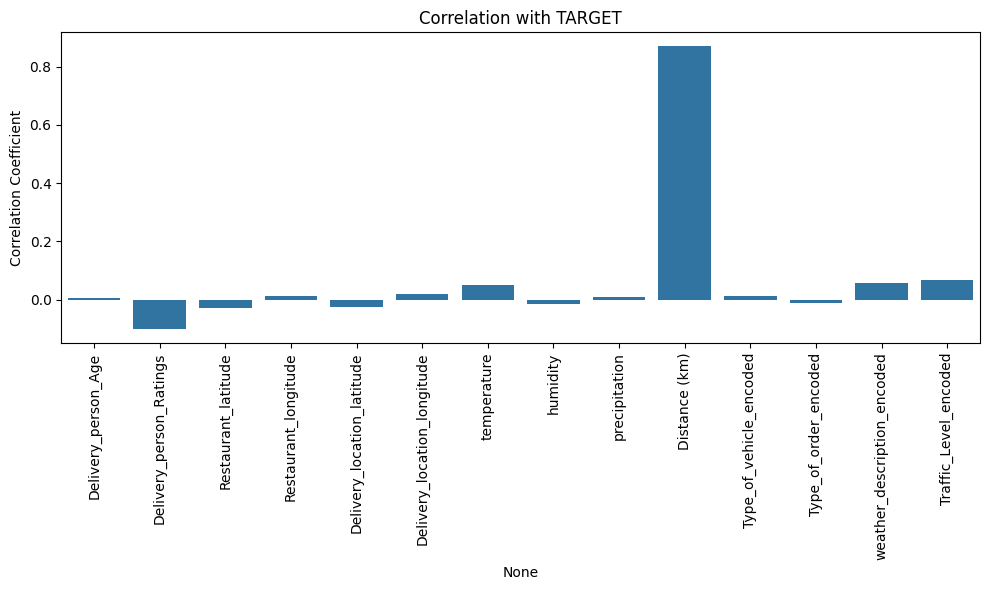

In [35]:
plot_correlations(df1, 'TARGET')

In [36]:
x=df1_clean[['Delivery_person_Ratings','temperature','weather_description_encoded','Distance (km)','Traffic_Level_encoded']]
y=df1_clean['TARGET'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
y_pred=rf.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('The mean square error is :',mse)
print('The R2 score is :',r2)

The mean square error is : 27.314080893324764
The R2 score is : 0.8990380402770886


In [38]:
column_to_check = "TARGET"  # You can change this to any column name

# Split into two datasets
df_no_missing = df1[df1[column_to_check].notna()]  # Rows where the column is NOT missing
df_missing = df1[df1[column_to_check].isna()]      # Rows where the column IS missing

df_missing.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET,Type_of_vehicle_encoded,Type_of_order_encoded,weather_description_encoded,Traffic_Level_encoded
7131,21.0,4.9,13.066762,80.251865,13.196762,80.381865,28.35,76.0,0.17,28.92,NaN,1,3,5,3
7343,30.0,4.5,9.979186,76.317361,9.999186,76.337361,25.68,83.0,0.45,4.47,NaN,1,1,5,1
7359,35.0,4.6,13.005801,80.250744,13.115801,80.360744,28.40,82.0,0.15,26.06,NaN,2,1,5,3
7375,35.0,4.6,9.970717,76.285447,10.000717,76.315447,25.94,81.0,0.40,8.95,NaN,1,2,5,2
7397,35.0,4.5,13.081878,80.248519,13.191878,80.358519,28.34,86.0,0.14,25.34,NaN,3,2,5,3


In [39]:
df_missing['TARGET']=rf.predict(df_missing[['Delivery_person_Ratings','temperature','weather_description_encoded','Distance (km)','Traffic_Level_encoded']])
df_missing.head()

C:\Users\Cv\AppData\Local\Temp\ipykernel_11724\3096668363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['TARGET']=rf.predict(df_missing[['Delivery_person_Ratings','temperature','weather_description_encoded','Distance (km)','Traffic_Level_encoded']])


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET,Type_of_vehicle_encoded,Type_of_order_encoded,weather_description_encoded,Traffic_Level_encoded
7131,21.0,4.9,13.066762,80.251865,13.196762,80.381865,28.35,76.0,0.17,28.92,65.154017,1,3,5,3
7343,30.0,4.5,9.979186,76.317361,9.999186,76.337361,25.68,83.0,0.45,4.47,17.615222,1,1,5,1
7359,35.0,4.6,13.005801,80.250744,13.115801,80.360744,28.40,82.0,0.15,26.06,59.595889,2,1,5,3
7375,35.0,4.6,9.970717,76.285447,10.000717,76.315447,25.94,81.0,0.40,8.95,30.494833,1,2,5,2
7397,35.0,4.5,13.081878,80.248519,13.191878,80.358519,28.34,86.0,0.14,25.34,62.505111,3,2,5,3


In [40]:
df1['precipitation'] = df1['precipitation'].astype(float)

df1.update(df_missing)
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET,Type_of_vehicle_encoded,Type_of_order_encoded,weather_description_encoded,Traffic_Level_encoded
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,17.11,77.0,0.0,4.288,21.66666667,2,3,4,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19.50,93.0,0.0,37.170,85.26666667,3,3,6,3
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,20.45,91.0,0.0,3.340,28.58333333,2,1,6,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,23.86,78.0,0.0,10.050,35.18333333,2,0,6,2
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26.55,87.0,0.0,9.890,43.45,3,3,6,0


In [42]:
df1.isna().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
temperature                    0
humidity                       0
precipitation                  0
Distance (km)                  0
TARGET                         0
Type_of_vehicle_encoded        0
Type_of_order_encoded          0
weather_description_encoded    0
Traffic_Level_encoded          0
dtype: int64

In [43]:
df1.shape

(9080, 15)

In [44]:
df2=df1
# Reversing the encoded columns
df2['Type_of_vehicle'] = le_veh.inverse_transform(df2['Type_of_vehicle_encoded'])
df2['Type_of_order'] = le_ord.inverse_transform(df2['Type_of_order_encoded'])
df2['weather_description'] = le_wea.inverse_transform(df2['weather_description_encoded'])
df2['Traffic_Level'] = le_tra.inverse_transform(df2['Traffic_Level_encoded'])
df2

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET,Type_of_vehicle_encoded,Type_of_order_encoded,weather_description_encoded,Traffic_Level_encoded,Type_of_vehicle,Type_of_order,weather_description,Traffic_Level
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,17.11,77.0,0.0,4.288,21.66666667,2,3,4,1,motorcycle,Snack,haze,Low
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19.50,93.0,0.0,37.170,85.26666667,3,3,6,3,scooter,Snack,mist,Very High
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,20.45,91.0,0.0,3.340,28.58333333,2,1,6,1,motorcycle,Drinks,mist,Low
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,23.86,78.0,0.0,10.050,35.18333333,2,0,6,2,motorcycle,Buffet,mist,Moderate
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26.55,87.0,0.0,9.890,43.45,3,3,6,0,scooter,Snack,mist,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,4.0,19.091458,72.827808,19.101458,72.837808,28.03,57.0,0.0,3.780,18.2,2,2,10,1,motorcycle,Meal,smoke,Low
9996,32.0,4.2,22.310237,73.158921,22.400237,73.248921,23.96,64.0,0.0,18.920,32.61666667,2,2,4,0,motorcycle,Meal,haze,High
9997,36.0,4.7,17.483216,78.552111,17.493216,78.562111,22.94,60.0,0.0,2.640,12.01666667,2,2,4,1,motorcycle,Meal,haze,Low
9998,37.0,4.6,26.913987,75.752891,27.053987,75.892891,23.72,31.0,0.0,28.800,51.06666667,3,0,1,3,scooter,Buffet,clear sky,Very High


In [45]:
df2= df2.drop(columns=['Type_of_order_encoded','Type_of_vehicle_encoded','weather_description_encoded','Traffic_Level_encoded'],axis=1)

In [46]:
df.update(df2)
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,...,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET,Type_of_vehicle_encoded,Type_of_order_encoded,weather_description_encoded,Traffic_Level_encoded
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,...,77.0,0.0,haze,Low,4.288,21.66666667,2,3,4,1
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,...,93.0,0.0,mist,Very High,37.170,85.26666667,3,3,6,3
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,...,91.0,0.0,mist,Low,3.340,28.58333333,2,1,6,1
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,...,78.0,0.0,mist,Moderate,10.050,35.18333333,2,0,6,2
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,...,87.0,0.0,mist,High,9.890,43.45,3,3,6,0


In [49]:
df.to_csv('clean_Food_Time_Data_set.csv', index=False)